In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

In [3]:
df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
df.rename(columns={'1000025':'ID','2.1':'class'},inplace=True)

In [5]:
df['class']

0      2
1      2
2      2
3      2
4      4
      ..
693    2
694    2
695    4
696    4
697    4
Name: class, Length: 698, dtype: int64

In [6]:
df['class']=df['class'].map({2:0,4:1})

In [7]:
df['class']

0      0
1      0
2      0
3      0
4      1
      ..
693    0
694    0
695    1
696    1
697    1
Name: class, Length: 698, dtype: int64

In [8]:
df.dtypes

ID        int64
5         int64
1         int64
1.1       int64
1.2       int64
2         int64
1.3      object
3         int64
1.4       int64
1.5       int64
class     int64
dtype: object

In [9]:
import numpy as np
df['1.3'].replace(np.nan,0,inplace=True)

In [10]:
df['1.3'].unique()

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [11]:
df['1.3'].replace('?',0,inplace=True)

In [12]:
df['1.3']=df['1.3'].astype(int)

In [13]:
df.dtypes

ID       int64
5        int64
1        int64
1.1      int64
1.2      int64
2        int64
1.3      int32
3        int64
1.4      int64
1.5      int64
class    int64
dtype: object

In [14]:
x=df[['5','1','1.1','1.2','2','1.3','3','1.4','1.5']]
y=df['class']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression

## Model Building

In [20]:
from sklearn.neighbors import KNeighborsClassifier
KN_model=KNeighborsClassifier(n_neighbors=4)


KNeighborsClassifier(n_neighbors=4)

## Model Training

In [28]:
KN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

## Model Prediction

In [21]:
KN_predicting=KN_model.predict(x_test)

In [22]:
print("y true :",y_test[:10].values)
print("y predict :",KN_predicting[:10])

y true : [1 0 1 1 0 0 1 0 0 0]
y predict : [1 0 1 1 0 0 0 0 0 0]


## Model Evalutaion

In [26]:
accuracy_score=KN_model.score(x_test,y_test)
print("Accuracy of Logistic Regressor:",accuracy_score*100)

Accuracy of Logistic Regressor: 97.71428571428571


<Axes: >

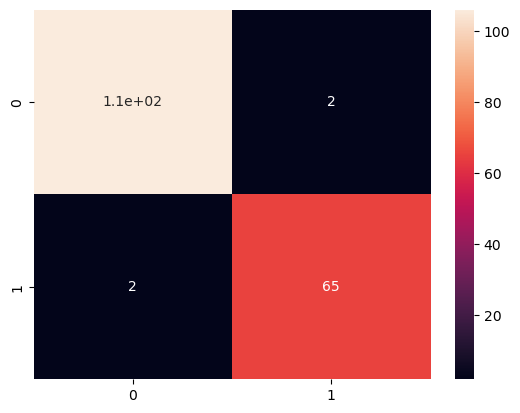

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,KN_predicting)
sns.heatmap(cm,annot=True)